## aggregate data frames

In [21]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
train_data = pd.read_pickle('../data/cleaned_train_data.pkl')
train_data.head(5)

,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,...,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


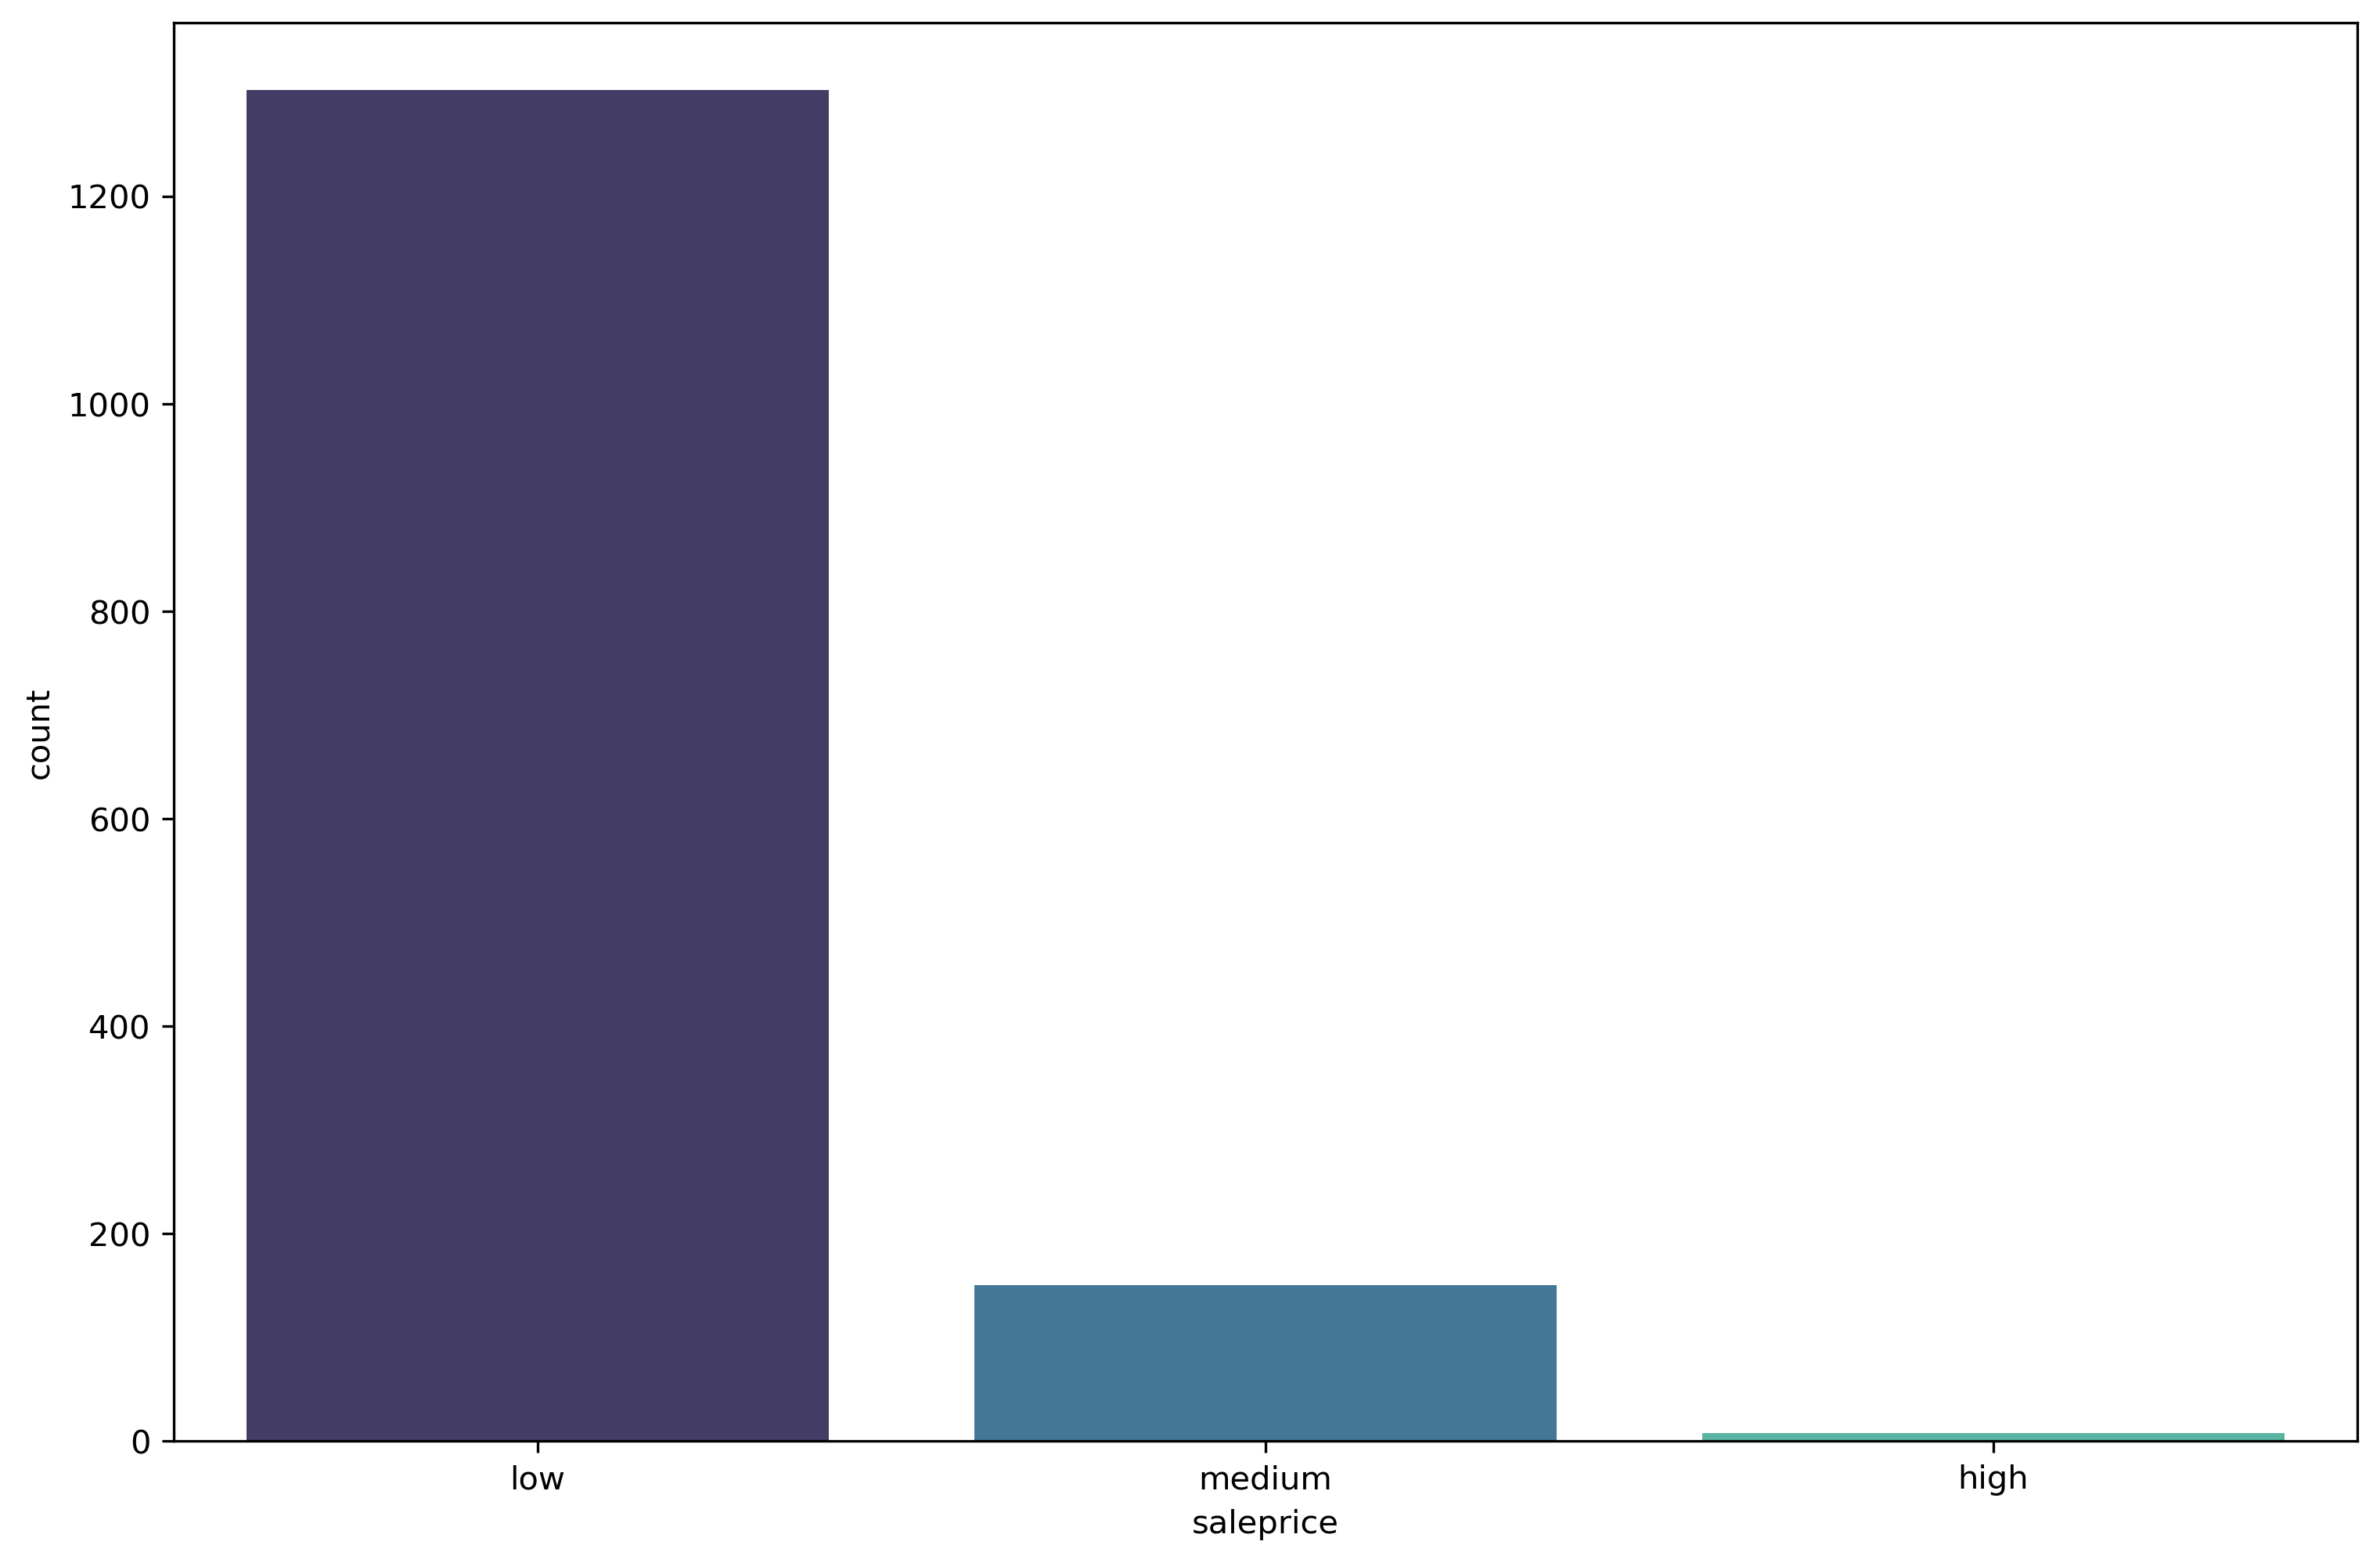

In [11]:
# put sale price into ordinal form
sales_price_levels = pd.cut(train_data['saleprice'],bins=3,labels=['low','medium','high'])

plt.figure(figsize=[12,8],dpi=300)
sns.countplot(sales_price_levels,palette='mako')
plt.show()

In [24]:
numerical_features = train_data.select_dtypes(include=np.number)
numerical_features.head(5)

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,...,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [34]:
# z scores
saleprice_z = np.abs(ss.zscore(numerical_features['saleprice']))
saleprice_z

array([0.34727322, 0.00728832, 0.53615372, ..., 1.07761115, 0.48852299,
       0.42084081])

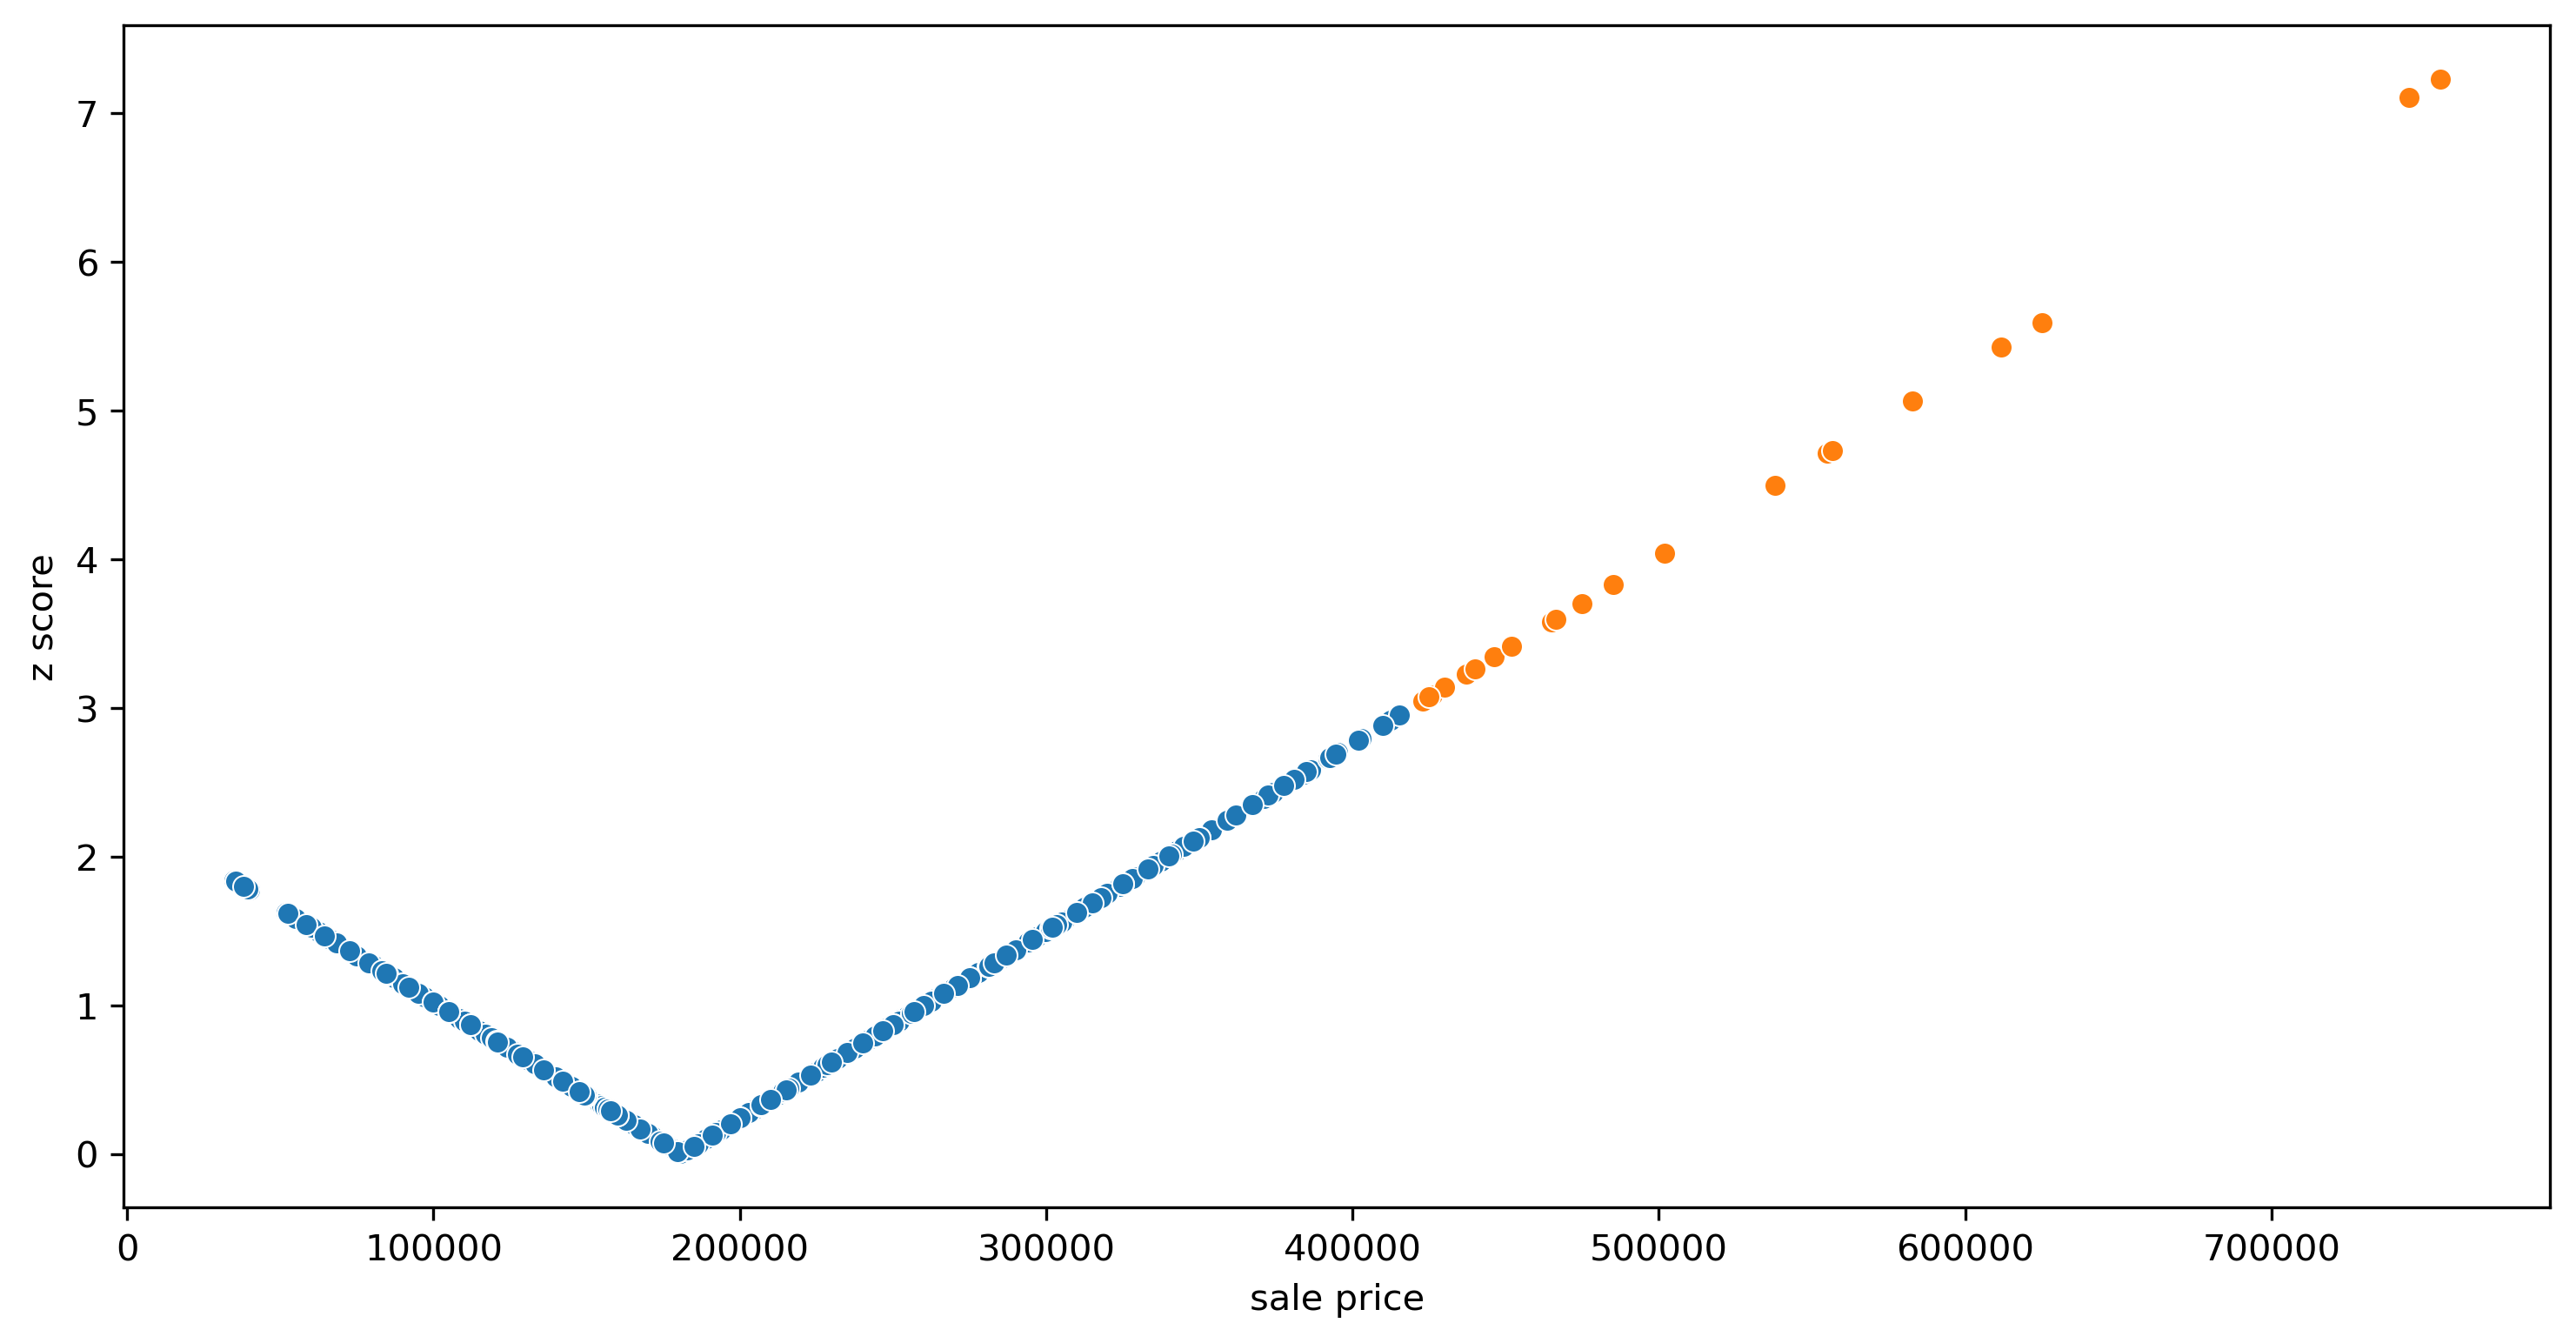

In [36]:
plt.figure(figsize=[12,6],dpi=300)
sns.scatterplot(x=train_data[saleprice_z<3]['saleprice'],y=saleprice_z[saleprice_z<3])
sns.scatterplot(x=train_data[saleprice_z>3]['saleprice'],y=saleprice_z[saleprice_z>3])
plt.xlabel('sale price')
plt.ylabel('z score')
plt.show()